# Bài 3: Sử dụng lại code thu thập dữ liệu từ Phần 3, viết chương trình gồm các chức năng sau:


In [115]:
import pandas as pd 

In [ ]:
import gspread
from google.oauth2.service_account import Credentials

scopes = ['https://www.googleapis.com/auth/spreadsheets']

credentials = Credentials.from_service_account_file(
    'C:/Users/NewDat/Downloads/green-crowbar-456007-s6-6c172ee0ec14.json', scopes=scopes)

gc = gspread.authorize(credentials)

sheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1XEFg047aSbg3OsEVx9PzmgSxGbCvCidfLiHfsgRS3R0/edit?gid=0#gid=0")  # Hoặc open_by_url()
worksheet = sheet.get_worksheet(0)  


data = worksheet.get_all_values()

import pandas as pd
df = pd.DataFrame(data[1:], columns=data[0])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7006 entries, 0 to 7005
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Prefecture Patient Number       7006 non-null   object
 1   City Patient Number             7006 non-null   object
 2   Date Announced                  7006 non-null   object
 3   Date Added                      7006 non-null   object
 4   Age Bracket                     7006 non-null   object
 5   Gender                          7006 non-null   object
 6   Residence City, Prefecture      7006 non-null   object
 7   Detected City                   7006 non-null   object
 8   Detected Prefecture             7006 non-null   object
 9   Status                          7006 non-null   object
 10  Notes                           7006 non-null   object
 11  Source(s)                       7006 non-null   object
 12  Related Patients                7006 non-null   

In [118]:
df['Detected City'] = df['Detected City'].str.strip().replace('', 'unknown')

## a) Liệt kê số ca nhiễm theo từng thành phố (Detected City).


In [119]:
data_detected_city = df.groupby('Detected City')['Prefecture Patient Number'].count().reset_index(name='Count')
print(data_detected_city) 

    Detected City  Count
0           Abiko      2
1           Agano      3
2            Ageo      1
3           Ainan      1
4            Aira      2
..            ...    ...
470      Yukuhasi      1
471     Yurihonjo      2
472       unknown   3703
473   unspecified      6
474        Ōmachi      2

[475 rows x 2 columns]


In [123]:
df['Age Bracket'] = pd.to_numeric(df['Age Bracket'], errors='coerce')
df['Age Bracket'] = df['Age Bracket']
print(df['Age Bracket'])

0       50.0
1       40.0
2       40.0
3       40.0
4       50.0
        ... 
7001    50.0
7002     NaN
7003     NaN
7004     NaN
7005    80.0
Name: Age Bracket, Length: 7006, dtype: float64


In [ ]:
data_age_bracket = df.groupby('Age Bracket')['Prefecture Patient Number'].count().reset_index(name = 'Count') #group_by bỏ qua nan
print(data_age_bracket)

    Age Bracket  Count
0           0.0    116
1          10.0    196
2          20.0    991
3          30.0    852
4          40.0   1045
5          50.0   1232
6          60.0    843
7          70.0    667
8          80.0    530
9          90.0    193
10        100.0      3


## b) Liệt kê số ca nhiễm theo độ tuổi, vẽ biểu đồ (sử dụng hàm plot).


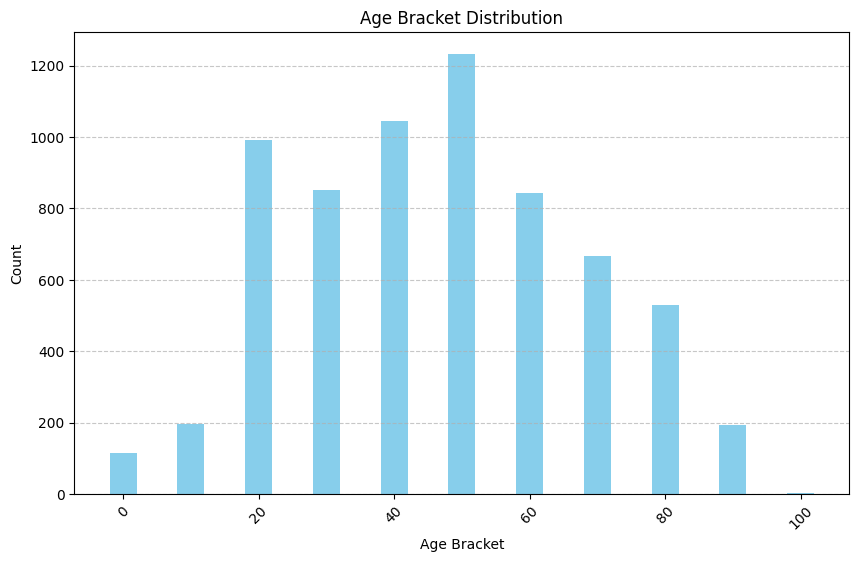

In [149]:
import matplotlib.pyplot as plt

X = data_age_bracket['Age Bracket']
y = data_age_bracket['Count']

plt.figure(figsize=(10, 6))
plt.bar(X, y, color='skyblue',width=4)
plt.xlabel('Age Bracket')
plt.ylabel('Count')
plt.title('Age Bracket Distribution')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## c) Liệt kê số ca nhiễm tại Hokkaido theo từng ngày. Vẽ biểu đồ.

In [129]:
detected_perfucture = df.groupby('Date Added')['Detected Prefecture'].count().reset_index()
print(detected_perfucture)

    Date Added  Detected Prefecture
0   2020-01-28                    2
1   2020-01-30                    3
2   2020-01-31                    1
3   2020-02-01                    3
4   2020-02-04                    3
..         ...                  ...
81  2020-04-26                  116
82  2020-04-27                  128
83  2020-04-28                  149
84  2020-04-29                  104
85  2020-04-30                   64

[86 rows x 2 columns]


In [144]:
detected_perfucture['Date Added'] = pd.to_datetime(detected_perfucture['Date Added'], format='%Y-%m-%d', errors='coerce')

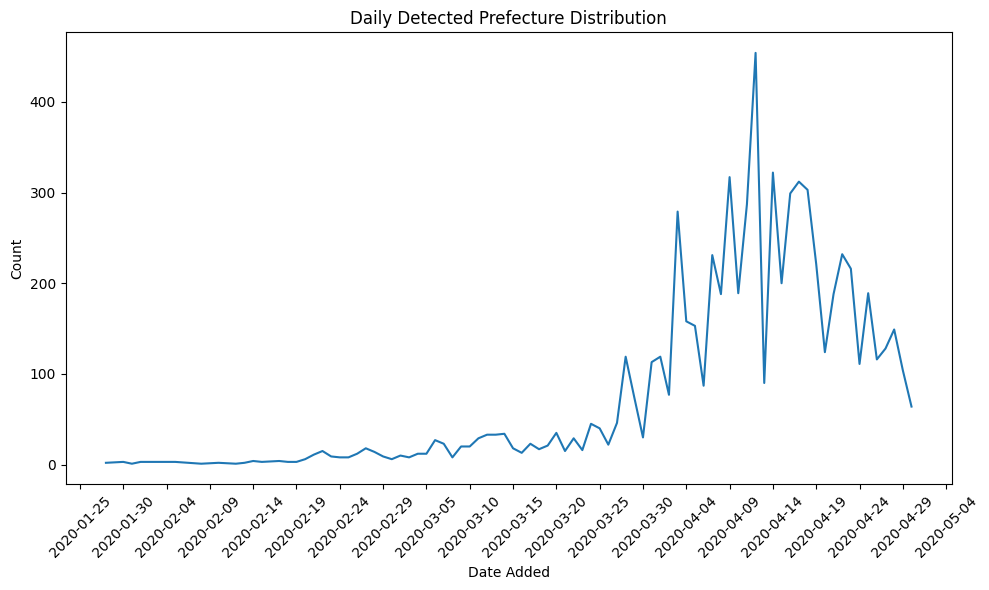

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

X = detected_perfucture['Date Added']
y = detected_perfucture['Detected Prefecture']

plt.figure(figsize=(10, 6))
plt.plot(X, y, linestyle='-') 

ax = plt.gca()

ax.xaxis.set_major_locator(mdates.DayLocator(interval=5)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.xlabel('Date Added')
plt.ylabel('Count')
plt.title('Daily Detected Prefecture Distribution')
plt.xticks(rotation=45) 

plt.show()